IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

IMPORT DATASET

Data Source : https://www.kaggle.com/datasets/jnegrini/fbstock

In [4]:
# https://drive.google.com/file/d/1j032XJ75ZZwICYnC2Vwgk7kk-_yRWNBR/view?usp=drive_link
! gdown 1j032XJ75ZZwICYnC2Vwgk7kk-_yRWNBR

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1j032XJ75ZZwICYnC2Vwgk7kk-_yRWNBR 



Downloading...
From: https://drive.google.com/file/d/1j032XJ75ZZwICYnC2Vwgk7kk-_yRWNBR/view?usp=drive_link
To: /content/FB.csv

  

In [5]:
train_data = pd.read_csv('FB.csv')
train_data.head()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,...,1,0,0,0,0,0,0,0,0,1
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,...,1,0,0,1,0,1,0,0,0,0
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,...,0,1,1,1,0,0,0,0,1,0
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,...,0,1,0,0,0,0,0,0,1,0
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,...,0,0,1,1,1,1,1,0,1,0


Check missing value

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1608 non-null   object 
 1   ID                   1608 non-null   int64  
 2   Close                1608 non-null   float64
 3   Low                  1608 non-null   float64
 4   High                 1608 non-null   float64
 5   Volume               1608 non-null   int64  
 6   C(t-5)               1608 non-null   float64
 7   C(t-4)               1608 non-null   float64
 8   C(t-3)               1608 non-null   float64
 9   C(t-2)               1608 non-null   float64
 10  C(t-4)>C(t-5)        1608 non-null   int64  
 11  C(t-3)>C(t-4)        1608 non-null   int64  
 12  C(t-2)>C(t-3)        1608 non-null   int64  
 13  C(t-1)>C(t-2)        1608 non-null   int64  
 14  MA-10                1608 non-null   float64
 15  MA-5                 1608 non-null   f

Check statistic vales for every features

In [7]:
train_data.describe()

,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),C(t-4)>C(t-5),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
count,1608.000000,1608.000000,1608.000000,1608.000000,1.608000e+03,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,...,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,42267.633085,99.647052,98.539378,100.660827,3.560666e+07,99.389969,99.454471,99.517257,99.582668,0.525498,...,0.475124,0.483209,0.526741,0.541045,0.519279,0.525498,0.473881,0.539801,0.544776,0.524254
std,673.870627,52.506035,52.060174,52.851121,2.825141e+07,52.587770,52.567562,52.545763,52.526129,0.499505,...,0.499536,0.499873,0.499440,0.498467,0.499784,0.499505,0.499473,0.498568,0.498146,0.499567
min,41099.000000,17.730000,17.549999,18.270000,5.913100e+06,17.730000,17.730000,17.730000,17.730000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41687.000000,58.524999,57.354999,59.807499,1.811930e+07,58.117500,58.180000,58.220000,58.440000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42268.500000,94.280002,93.259998,95.395001,2.639990e+07,94.155000,94.165000,94.180000,94.225000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,42851.250000,142.060001,140.850003,142.882500,4.387575e+07,142.060000,142.060000,142.060000,142.060000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,43432.000000,217.500000,214.270004,218.619995,3.654579e+08,217.500000,217.500000,217.500000,217.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Handle datetime data for time series

In [8]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),C(t-4)>C(t-5),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,0,...,1,0,0,0,0,0,0,0,0,1
2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,1,...,1,0,0,1,0,1,0,0,0,0
2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,1,...,0,1,1,1,0,0,0,0,1,0
2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,1,...,0,1,0,0,0,0,0,0,1,0
2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,1,...,0,0,1,1,1,1,1,0,1,0


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

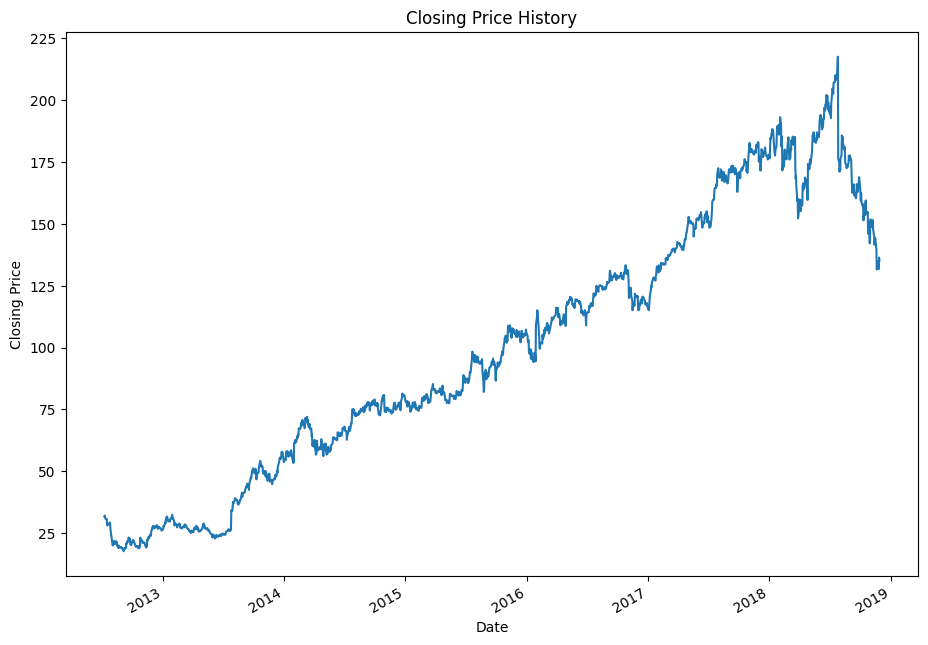

In [25]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

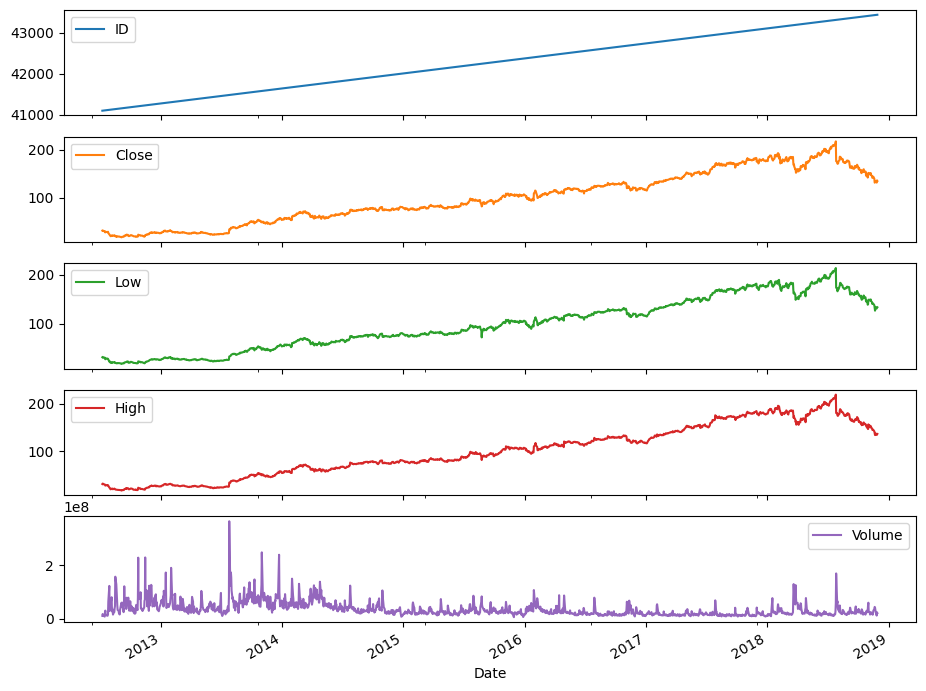

In [17]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['ID', 'Close', 'Low', 'High', 'Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [27]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['ID']) / train_data['ID'] * 100.0

In [28]:
df = train_data[['HL_PCT', 'PCT_change', 'Close','Volume']]

In [29]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Close'].shift(-forecast_out)

81


<ipython-input-29-e4fd59988e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Close'].shift(-forecast_out)


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [31]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-31-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [32]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [33]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-33-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [36]:
lr_confidence

0.9164923100595658

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [38]:
rf_confidence

0.9687322244115832

In [39]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-39-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-39-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-39-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

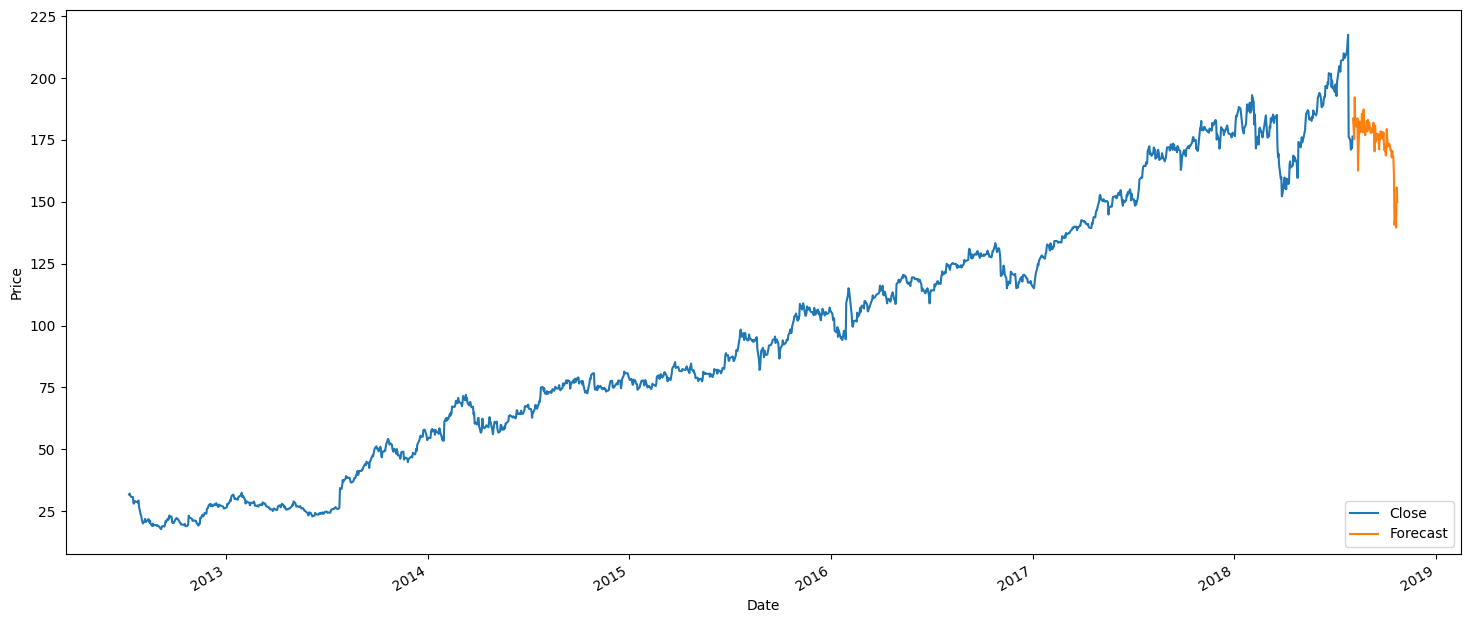

In [41]:
plt.figure(figsize=(18, 8))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()